Bài 6a. Phân loại với KNN (Sử dụng KNeighborsClassifier)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Lesson5_a_Weather.csv')

Saving Lesson5_a_Weather.csv to Lesson5_a_Weather.csv


In [2]:
df.head(5)

,id,outlook,temperature,humidity,wind,play
0,1,sunny,hot,high,weak,no
1,2,sunny,hot,high,strong,no
2,3,overcast,hot,high,weak,yes
3,4,rainy,mild,high,weak,yes
4,5,rainy,cool,normal,weak,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           14 non-null     int64 
 1   outlook      14 non-null     object
 2   temperature  14 non-null     object
 3   humidity     14 non-null     object
 4   wind         14 non-null     object
 5   play         14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [4]:
# bảng dữ liệu dạng chuỗi nên chúng ta chuyển về dạng số để máy tính có thể tính toán được

from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df.head(5)

,id,outlook,temperature,humidity,wind,play
0,0,2,1,0,1,0
1,1,2,1,0,0,0
2,2,0,1,0,1,1
3,3,1,2,0,1,1
4,4,1,0,1,1,1


In [5]:
df = df.drop(['id'],axis='columns')
df.head(5)

,outlook,temperature,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [6]:
x = df.iloc[:,:-1].values
y = df.play

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.6)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)
y_predict_KNN = model_knn.predict(x_test)
y_predict_KNN

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
y_test

8     1
6     1
4     1
11    1
2     1
13    0
9     1
1     0
7     0
Name: play, dtype: int64

In [10]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cnf_confusion = confusion_matrix(y_test, y_predict_KNN)
cnf_confusion

array([[0, 3],
       [0, 6]])

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict_KNN)

0.6666666666666666

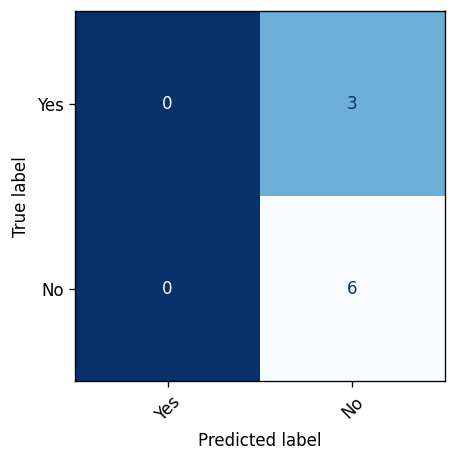

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize = (4,4))
labels = ['Yes','No']
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_KNN, ax = ax, colorbar = False, display_labels = labels, xticks_rotation = 45, cmap = 'Blues_r')

Ví dụ 2: Thực hành với việc sử dụng data về rượu trên thư viện sklearn

In [13]:
from sklearn import datasets
wine = datasets.load_wine()
dir(wine) #dùng lệnh này để lấy tên tất cả các cột trong datasets

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [14]:
#đưa dữ liệu và các tên cột tương ứng vào 1 data frame để dễ hình dung

df = pd.DataFrame(wine.data, columns = wine.feature_names)
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [15]:
df['target'] = wine.target
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [16]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state = 0, test_size = 0.3)

In [17]:
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(x_train, y_train)
y_predict_knn = model_knn.predict(x_test)
y_predict_knn

array([0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 2,
       1, 2, 1, 0, 2, 0, 2, 2, 0, 2])

In [18]:
print('Accuracy: ', accuracy_score(y_test,y_predict_knn))

Accuracy:  0.7777777777777778


In [19]:
ac = [] #tạo list rỗng chứa giá trị của độ chính xác
for k in range(2,20,1):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_predict = knn.predict(x_test)
  ac.append(metrics.accuracy_score(y_test, y_predict))
  print('Accuracy: ',metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.6666666666666666
Accuracy:  0.7037037037037037
Accuracy:  0.7592592592592593
Accuracy:  0.7222222222222222
Accuracy:  0.7222222222222222
Accuracy:  0.7777777777777778
Accuracy:  0.6481481481481481
Accuracy:  0.7222222222222222
Accuracy:  0.7037037037037037
Accuracy:  0.7037037037037037
Accuracy:  0.7222222222222222
Accuracy:  0.7222222222222222
Accuracy:  0.7222222222222222
Accuracy:  0.7407407407407407
Accuracy:  0.7407407407407407
Accuracy:  0.7407407407407407
Accuracy:  0.7222222222222222
Accuracy:  0.7407407407407407


In [20]:
len(ac)

18

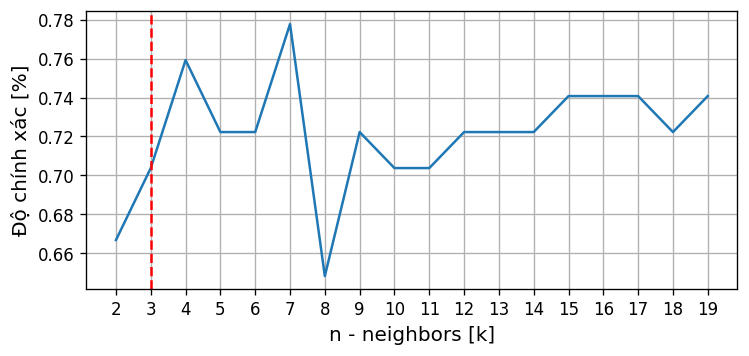

In [21]:
# vẽ hình thể hiện độ chính xác theo giá trị n_neighbors

plt.xlabel('n - neighbors [k]',fontsize = 12)
plt.ylabel('Độ chính xác [%]', fontsize = 12)
plt.plot(range(2,20), ac)
plt.xticks(range(2,20))
plt.axvline(x=3, c = 'r', linestyle = '--')
plt.grid('minor')

Bài 6b. Phân loại với Support Vector Machine


Ví dụ 1: Thực hành với việc sử dụng data về ung thư trên thư viện sklearn

In [22]:
cancer = datasets.load_breast_cancer()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [23]:
cancer.data.shape

(569, 30)

In [24]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0, test_size=0.5)

In [26]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear', C=0.001, gamma = 0.0001) #sử dụng linear kernel
model_svm.fit(x_train, y_train)
y_predict_svm = model_svm.predict(x_test)
y_predict_svm

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [27]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [28]:
accuracy_score(y_test, y_predict_svm)

0.9333333333333333

In [29]:
#đánh giá độ chính xác của mô hình
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_svm))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       101
           1       0.95      0.95      0.95       184

    accuracy                           0.93       285
   macro avg       0.93      0.93      0.93       285
weighted avg       0.93      0.93      0.93       285



In [30]:
# vẽ confusion_matrix theo hàm plot có sẵn
#plot_confusion_matrix(model_svm, x_test, y_test)

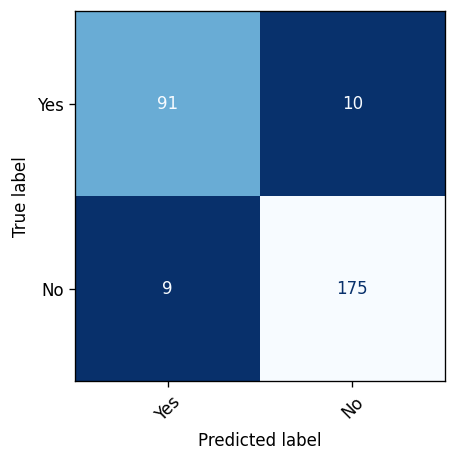

In [31]:
fig, ax = plt.subplots(figsize=(4,4))
labels = ['Yes','No']
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_svm, ax = ax, display_labels = labels, colorbar = False, cmap = 'Blues_r', xticks_rotation = 45)

In [39]:
# nâng cao độ chính xác của mô hình với grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

##tìm kiếm hyperparameter (C[1,+], gamma[>0.1])

hps = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 0.2, 0.3, 1, 100, 1000],
    'kernel': ['linear']#, 'poly', 'rbf', 'sigmoid'],
}

grids = GridSearchCV(SVC(),hps)

In [42]:
#In ra báo cáo đánh giá của mô hình
print(classification_report(y_test, y_predict_svm))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       101
           1       0.95      0.95      0.95       184

    accuracy                           0.93       285
   macro avg       0.93      0.93      0.93       285
weighted avg       0.93      0.93      0.93       285

